# Pratik Kadam
NLP Exam

### Importing Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from gensim.models import Word2Vec
import nltk
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

### Dataset

In [2]:
# Load the IMDb dataset
df_1 = pd.read_csv(r"D:\NLP LMS Exam\DATASET\IMDB Dataset.csv")  
df_1.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


#### As the Given Condition 
Choose 10,000 top rows 

In [3]:
# Select the first 10,000 rows
df = df_1.head(10000)

In [4]:
df.shape

(10000, 2)

In [5]:
df_copy = df

#### Checking Null Values

In [6]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

* No null values

In [7]:
df = pd.DataFrame(df.review) 
df.head()

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."


### Q1. Preprocess the text (i.e., the steps required prior to converting the sentence into a vector) using any library of your choice

### Data Cleaning / Data Pre-Processing

### Steps :
1) Lower Case
2) Removing URL
3) Removing Punctuations
4) Removing Numbers
5) Removing Stopwords
6) Lemmitization
7) Removing Extra white space

### Converting Lower case

In [8]:
df.review = df.review.str.lower()
df.iloc[1,0]

'a wonderful little production. <br /><br />the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />the actors are extremely well chosen- michael sheen not only "has got all the polari" but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. a masterful production about one of the great master\'s of comedy and his life. <br /><br />the realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. it plays on our knowledge and our senses, particularly with the scenes concerning orton and halliwell and the sets (particularly of their flat with halliwell\'s murals decorating every surface) are terribly well d

### Removing URL

In [9]:
df.review = df.review.str.replace(r'http\S+|www.\S+',"", case = False)
df.iloc[1,0]

'a wonderful little production. <br /><br />the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />the actors are extremely well chosen- michael sheen not only "has got all the polari" but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. a masterful production about one of the great master\'s of comedy and his life. <br /><br />the realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. it plays on our knowledge and our senses, particularly with the scenes concerning orton and halliwell and the sets (particularly of their flat with halliwell\'s murals decorating every surface) are terribly well d

### Removing Punctuations

In [10]:
import string
string.punctuation

def remove_punctuation(abc):
    text_nopunt="".join([c  
                         for c in abc  
                         if c not in string.punctuation])
    return text_nopunt

In [11]:
df.review = df.review.apply(lambda x : remove_punctuation(x))
df.iloc[1,0]

'a wonderful little production br br the filming technique is very unassuming very oldtimebbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece br br the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great masters of comedy and his life br br the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwells murals decorating every surface are terribly well done'

### Removing Numbers

In [12]:
df['review'] = df['review'].str.replace('\d+','')  # data.text  or data['text']
df.iloc[1,0]

'a wonderful little production br br the filming technique is very unassuming very oldtimebbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece br br the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great masters of comedy and his life br br the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwells murals decorating every surface are terribly well done'

### Removing Stopwords

In [13]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [14]:
df['review'] = df['review'].apply(lambda x: ' '.join([abc   
                                                      for abc in x.split() 
                                                      if abc not in (stop)]))
df.iloc[1,0]

'wonderful little production br br filming technique unassuming oldtimebbc fashion gives comforting sometimes discomforting sense realism entire piece br br actors extremely well chosen michael sheen got polari voices pat truly see seamless editing guided references williams diary entries well worth watching terrificly written performed piece masterful production one great masters comedy life br br realism really comes home little things fantasy guard rather use traditional dream techniques remains solid disappears plays knowledge senses particularly scenes concerning orton halliwell sets particularly flat halliwells murals decorating every surface terribly well done'

### Lemmitization

In [15]:
from nltk.stem import WordNetLemmatizer 
import nltk

lemmatizer = WordNetLemmatizer() # ASSIGNING
word_tokenizer = nltk.tokenize.WhitespaceTokenizer() 

In [16]:
def lemmatize_review(review):
    return [lemmatizer.lemmatize(w,"v") 
            for w in word_tokenizer.tokenize(review)]

In [17]:
df.review = df.review.apply(lambda x :' '.join(lemmatize_review(x)))
df.iloc[1,0]

'wonderful little production br br film technique unassuming oldtimebbc fashion give comfort sometimes discomforting sense realism entire piece br br actors extremely well choose michael sheen get polari voice pat truly see seamless edit guide reference williams diary entries well worth watch terrificly write perform piece masterful production one great master comedy life br br realism really come home little things fantasy guard rather use traditional dream techniques remain solid disappear play knowledge sense particularly scenes concern orton halliwell set particularly flat halliwells murals decorate every surface terribly well do'

### Stripping Extra White Space

In [18]:
df['review'] = (df['review'].astype("str").str.rstrip())
df.iloc[1,0]

'wonderful little production br br film technique unassuming oldtimebbc fashion give comfort sometimes discomforting sense realism entire piece br br actors extremely well choose michael sheen get polari voice pat truly see seamless edit guide reference williams diary entries well worth watch terrificly write perform piece masterful production one great master comedy life br br realism really come home little things fantasy guard rather use traditional dream techniques remain solid disappear play knowledge sense particularly scenes concern orton halliwell set particularly flat halliwells murals decorate every surface terribly well do'

### Second Round of Cleaning

In [19]:
import re 
words = set(nltk.corpus.words.words())
def clean_text_round2(review):
    review =  re.sub(r"\b[a-zA-Z]\b", "", review)
    review =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", review) 
    review =  re.sub(r"make", "", review)  
    review =  re.sub(r"movie", "", review) 
    review =  re.sub(r"film", "", review) 
    review =  " ".join(w 
                     for w in nltk.wordpunct_tokenize(review)  
                      if w.lower() in words)     
    
    return review

In [20]:
df['review']=df['review'].apply(lambda x : clean_text_round2(x))

df = pd.DataFrame(df.review.apply(lambda x: clean_text_round2(x)))
df.iloc[1,0]

'wonderful little production technique unassuming fashion give comfort sometimes discomforting sense realism entire piece extremely well choose sheen get voice pat truly see seamless edit guide reference diary well worth watch terrificly write perform piece masterful production one great master comedy life realism really come home little fantasy guard rather use traditional dream remain solid disappear play knowledge sense particularly concern set particularly flat decorate every surface terribly well'

In [21]:
df.head()

,review
0,one mention watch episode hook right exactly h...
1,wonderful little production technique unassumi...
2,think wonderful way spend time hot summer week...
3,basically theres family little boy jake think ...
4,petter love time money visually stun watch off...


### Q2. Given any sentence, perform vector semantics i.e., convert the given dataset into vectors using Bag of Words approach.


### Term-Document Matrix

In [22]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english') 
data_cv = cv.fit_transform(df.review)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out()) # TERM = KEY WORDS

# One of the required inputs is a term-document matrix
tdm = data_dtm.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
aback,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
abandonment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abash,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abbas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
tdm['frequency'] = tdm.sum(axis=1)
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,frequency
aback,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
abandon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,115
abandonment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
abash,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
abbas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [24]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,frequency
0,aback,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,abandon,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,115
2,abandonment,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,abash,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,abbas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [25]:
tdm1 = tdm[["index","frequency"]] 
tdm1.rename(columns = {'index':'Word'}, inplace = True) # RENAMING 
tdm1.sort_values(by='frequency',ascending=False,inplace=True) # SORTING DATA 
tdm1.head(10)

,Word,frequency
9706,like,8626
17127,time,5846
7143,good,5783
18823,watch,5449
2586,character,5443
17030,think,4677
13572,really,4429
16174,story,4424
9849,look,3943
14620,say,3873


In [26]:
df['Sentiment']=df_copy.sentiment
df.head()

,review,Sentiment
0,one mention watch episode hook right exactly h...,positive
1,wonderful little production technique unassumi...,positive
2,think wonderful way spend time hot summer week...,positive
3,basically theres family little boy jake think ...,negative
4,petter love time money visually stun watch off...,positive


In [27]:
data_dtm['Sentiment']=df_copy.sentiment
data_dtm.head()

,aback,abandon,abandonment,abash,abbas,abbey,abbot,abbreviate,abdomen,abduct,...,zodiac,zombi,zombie,zone,zoo,zoological,zoology,zoom,zorro,Sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,negative
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive


### Dividing data into train and test dataset

In [28]:
from sklearn.model_selection import train_test_split

train_x = data_dtm.drop(['Sentiment'],axis=1)
train_y = data_dtm['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(train_x,train_y,test_size = 0.3,random_state=231)

### Q.3 Train a simple classifier (using Scikit-learn e.g.: SVM) to perform sentiment analysis on the generated dataset.

### Model Building

In [29]:
from sklearn.svm import SVC
model = SVC(kernel="linear")  
model.fit(X_train, y_train) 

SVC(kernel='linear')

### Prediction on Train data

In [30]:
train = pd.concat([X_train,y_train],axis=1)
train.head()

,aback,abandon,abandonment,abash,abbas,abbey,abbot,abbreviate,abdomen,abduct,...,zodiac,zombi,zombie,zone,zoo,zoological,zoology,zoom,zorro,Sentiment
9254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
5757,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
7306,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
9135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
6142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive


In [31]:
train['Prediction'] = model.predict(X_train)
train.head()

,aback,abandon,abandonment,abash,abbas,abbey,abbot,abbreviate,abdomen,abduct,...,zombi,zombie,zone,zoo,zoological,zoology,zoom,zorro,Sentiment,Prediction
9254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,positive,positive
5757,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,negative,negative
7306,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,positive,positive
9135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,positive,positive
6142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,positive,positive


In [32]:
from sklearn.metrics import classification_report

print(classification_report(train['Sentiment'], train['Prediction']))

              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      3480
    positive       1.00      1.00      1.00      3520

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000



* Model Accuracy : 100%

### Prediction on Test Data

In [33]:
test = pd.concat([X_test,y_test],axis=1)
test.head()

,aback,abandon,abandonment,abash,abbas,abbey,abbot,abbreviate,abdomen,abduct,...,zodiac,zombi,zombie,zone,zoo,zoological,zoology,zoom,zorro,Sentiment
6568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
5321,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
6874,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
9783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
8152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive


In [34]:
test['Prediction'] = model.predict(X_test)
test.head()

,aback,abandon,abandonment,abash,abbas,abbey,abbot,abbreviate,abdomen,abduct,...,zombi,zombie,zone,zoo,zoological,zoology,zoom,zorro,Sentiment,Prediction
6568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,negative,negative
5321,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,negative,negative
6874,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,negative,negative
9783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,positive,positive
8152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,positive,positive


In [35]:
print(classification_report(test['Sentiment'], test['Prediction']))

              precision    recall  f1-score   support

    negative       0.84      0.82      0.83      1492
    positive       0.82      0.85      0.84      1508

    accuracy                           0.83      3000
   macro avg       0.83      0.83      0.83      3000
weighted avg       0.83      0.83      0.83      3000



* Model Accuracy : 83%

### Q4. Repeat the above process again but now using word2vector. (for any sentence, take average of the vector representation of all the tokens to get the vector representation)

### Train a Word2Vec model

In [36]:
sentences = [review.split() for review in df['review']]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)

In [37]:
# Create sentence vectors by averaging word vectors
def get_sentence_vector(review):
    words = review.split()
    vector = sum(word2vec_model.wv[word] for word in words if word in word2vec_model.wv) / len(words)
    return vector

In [38]:
df['sentence_vector'] = df['review'].apply(get_sentence_vector)

In [39]:
df.head()

,review,Sentiment,sentence_vector
0,one mention watch episode hook right exactly h...,positive,"[-0.075944506, 0.1976274, 0.07739884, 0.077008..."
1,wonderful little production technique unassumi...,positive,"[-0.09768627, 0.19342005, -0.049848713, -0.032..."
2,think wonderful way spend time hot summer week...,positive,"[-0.070856355, 0.17214763, 0.052075647, 0.0097..."
3,basically theres family little boy jake think ...,negative,"[-0.044807967, 0.21758862, 0.15626526, -0.0148..."
4,petter love time money visually stun watch off...,positive,"[0.017618995, 0.18943162, 0.0619812, -0.023493..."


In [40]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(list(df['sentence_vector']), 
                                                    df['Sentiment'], test_size=0.2, random_state=42)

### Model Building

In [41]:
from sklearn.svm import SVC
model = SVC(kernel="linear") 
model.fit(X_train, y_train) 

SVC(kernel='linear')

In [42]:
# Evaluate the model
accuracy1 = model.score(X_train, y_train)
print("Accuracy (Word2Vec):", accuracy1)

Accuracy (Word2Vec): 0.82


In [43]:
# Evaluate the model
accuracy2 = model.score(X_test, y_test)
print("Accuracy (Word2Vec):", accuracy2)

Accuracy (Word2Vec): 0.8205


### Q5. Bonus: Mention the insights that you can derive from the movie reviews.

### Barchart of Words(Higgestfrequency to Lowest Frequency)

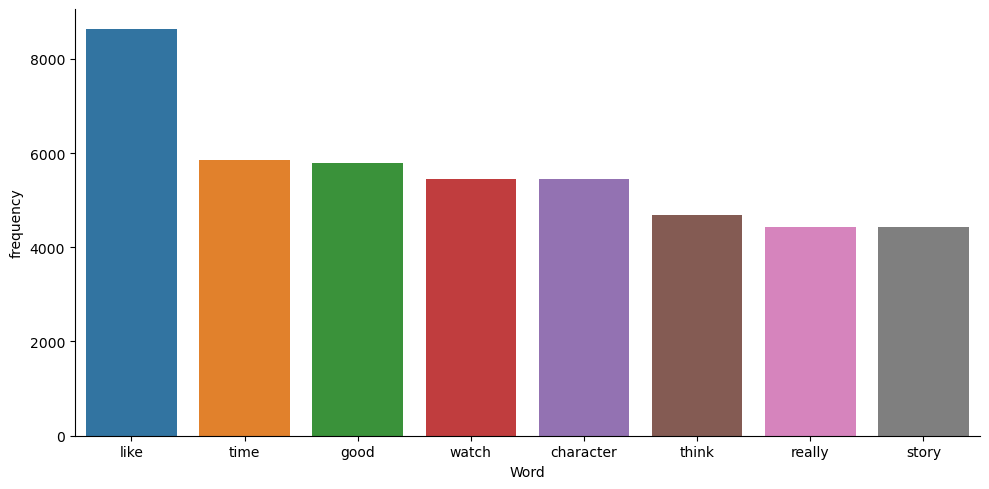

In [44]:
import seaborn as sns
w = tdm1[tdm1['frequency'] >=4000] 
fg = sns.catplot(x='Word', y='frequency',
                        aspect=2,
                        kind='bar', 
                        data=w)

### WordCloud

In [45]:
text = " ".join(review for review in df.review)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 6128244 words in the combination of all review.


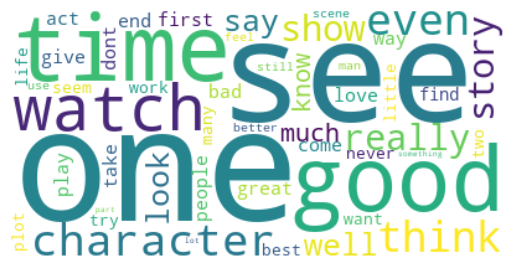

In [46]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)

# Generate a word cloud image
cloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      collocations=False,
                      max_words=50).generate(text)

plt.imshow(cloud, interpolation='bilinear') # IM = IMAGE 
plt.axis("off") 
plt.show()

### Piechart (Sentiment)

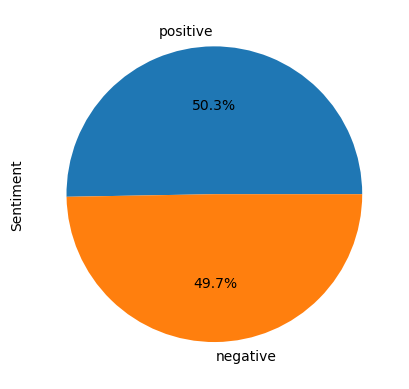

In [47]:
df.Sentiment.value_counts().plot.pie(autopct="%1.1f%%");

* In the Given Dataset Almost 50% Negative and 50% Positive Sentiment are there

## END